In [1]:
from tensorflow import keras
from keras.layers import Input, Dense, Flatten
from tensorflow.keras import  datasets
from matplotlib import pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
# from tensorflow.keras.utils import load_img, img_to_array, array_to_img
# def rgb_to_gray(data_set): 
#   data=[]
#   for i in data_set:
#    j=array_to_img(i)
#    j=j.convert('L')
#    j=img_to_array(j)
#    data.append(j)
#   return data
# x_train=rgb_to_gray(x_train)
# x_test=rgb_to_gray(x_test)
# x_train,x_test=np.array(x_train),np.array(x_test)

In [6]:
#Normalize image pixel values.
x_train = x_train/255
x_test = x_test/255

In [7]:
model=keras.Sequential() #Create a network sequence.
model.add(Input(shape=(32,32,3)))
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 256)               786688    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 820,874
Trainable params: 820,874
Non-trainable params: 0
_________________________________________________________________


In [8]:
batch_size=128
model.compile(optimizer='Adam',loss="sparse_categorical_crossentropy",metrics=['accuracy']) 
results=model.fit(x_train,y_train, epochs=20,validation_data=(x_test, y_test),
                   callbacks=keras.callbacks.EarlyStopping(patience=7,restore_best_weights=True)
                  )



Epoch 1/20
1563/1563 [==============================] - 16s 8ms/step - loss: 1.8517 - accuracy: 0.3314 - val_loss: 1.7184 - val_accuracy: 0.3901
Epoch 2/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6695 - accuracy: 0.4014 - val_loss: 1.5852 - val_accuracy: 0.4374
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5921 - accuracy: 0.4315 - val_loss: 1.5751 - val_accuracy: 0.4350
Epoch 4/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5451 - accuracy: 0.4478 - val_loss: 1.5475 - val_accuracy: 0.4406
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5101 - accuracy: 0.4602 - val_loss: 1.5828 - val_accuracy: 0.4401
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4828 - accuracy: 0.4687 - val_loss: 1.4961 - val_accuracy: 0.4659
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4623 - accuracy: 0.4763 - val_loss: 1.5056 - val_accuracy

In [9]:
score = model.evaluate(x_test, y_test)


313/313 [==============================] - 1s 3ms/step - loss: 1.4451 - accuracy: 0.4819


In [10]:
y_pred=model.predict(x_test)
y_pred.shape

313/313 [==============================] - 1s 2ms/step


(10000, 10)

In [11]:
from numpy import argmax
y_pred1=argmax(y_pred,axis=1)
y_pred1.shape

(10000,)

In [12]:
from sklearn.metrics import accuracy_score,  confusion_matrix
accuracy_score(y_test,y_pred1)*100

48.19

In [13]:
x_test.shape

(10000, 32, 32, 3)

In [14]:
print(confusion_matrix(y_test,y_pred1))

[[623  30  27  23  34  31  23  38 129  42]
 [ 73 591   9  16  18  27  18  39  58 151]
 [147  29 244  61 188  98 117  74  25  17]
 [ 50  21  59 238  75 259 161  65  26  46]
 [ 78  14  87  36 459  69 116 102  20  19]
 [ 46   9  68 155  83 410 102  80  19  28]
 [ 15  10  52  46 153  73 588  36   8  19]
 [ 66  24  34  41 102  76  39 549  20  49]
 [173  68   1  10  17  37  13  22 610  49]
 [ 83 157   3  29  14  26  37  47  97 507]]


0

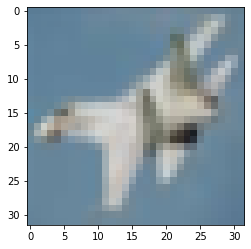

In [15]:
plt.imshow(x_test[10],cmap="gray")
y_pred1[10]

313/313 [==============================] - 1s 3ms/step - loss: 1.4451 - accuracy: 0.4819


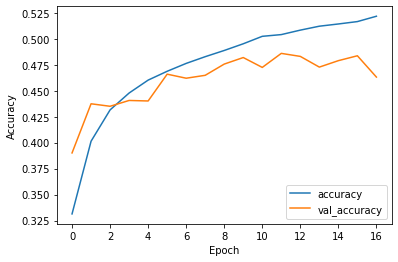

In [16]:
plt.plot(results.history['accuracy'], label='accuracy')
plt.plot(results.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test)